# For each and every model i read the data set into it, because im am facing some issues with kernal and my laptop computing power. for each model it takes 50-70 minutes to run for single modification , so itried morethen 25 modifications. following are the five models and their performance.




#DenseNet

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import numpy as np

tf.random.set_seed(42)
np.random.seed(42)


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2,
    fill_mode='nearest'
)

# DenseNet building blocks
def dense_block(x, num_layers, growth_rate):
    for _ in range(num_layers):
        cb = layers.BatchNormalization()(x)
        cb = layers.Activation('relu')(cb)
        cb = layers.Conv2D(growth_rate, 3, padding='same')(cb)
        x = layers.Concatenate()([x, cb])
    return x

def transition_layer(x, compression):
    filters = int(x.shape[-1] * compression)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(filters, 1, padding='same')(x)
    x = layers.AveragePooling2D(2, strides=2)(x)
    return x

def create_densenet_model(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(64, 3, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = dense_block(x, 6, 32)
    x = transition_layer(x, 0.5)

    x = dense_block(x, 12, 32)
    x = transition_layer(x, 0.5)

    x = dense_block(x, 24, 32)
    x = transition_layer(x, 0.5)


    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)


batch_size = 64
epochs = 25

#  DenseNet model
densenet_model = create_densenet_model()
densenet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Learning rate scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = densenet_model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[lr_scheduler, early_stopping],
    verbose=1
)

train_loss, train_accuracy = densenet_model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = densenet_model.evaluate(x_test, y_test, verbose=0)


print("\nDenseNet Model Results:")
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Testing accuracy: {test_accuracy:.4f}")
print(f"Training loss: {train_loss:.4f}")
print(f"Testing loss: {test_loss:.4f}")


densenet_model.save('cifar10_densenet_model.h5')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 264s 221ms/step - accuracy: 0.3576 - loss: 1.7613 - val_accuracy: 0.3164 - val_loss: 3.3974 - learning_rate: 0.0010
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 137s 140ms/step - accuracy: 0.5885 - loss: 1.1457 - val_accuracy: 0.3996 - val_loss: 2.3534 - learning_rate: 0.0010
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 109s 140ms/step - accuracy: 0.6787 - loss: 0.9190 - val_accuracy: 0.6677 - val_loss: 1.0163 - learning_rate: 0.0010
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 108s 139ms/step - accuracy: 0.7272 - loss: 0.7749 - val_accuracy: 0.6905 - val_loss: 1.0369 - learning_rate: 0.0010
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 109s 139ms/step - accuracy: 0.7701 - loss: 0.6630 - val_accuracy: 0.6981 - val_loss: 0.9260 - learning_rate: 0.0010
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 104s 133ms/step - accuracy: 0.7956 - loss: 0.5887 - val_accuracy: 0.7643 - val_loss: 0.7151 - learning_rate: 0.0010
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 109s 139ms/step - accuracy: 0.8181 


DenseNet Model Results:
Training accuracy: 0.9731
Testing accuracy: 0.9195
Training loss: 0.0750
Testing loss: 0.2704


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

epochs = list(range(1, 26))
train_accuracy = [
    0.3576, 0.5885, 0.6787, 0.7272, 0.7701, 0.7956, 0.8181, 0.8348, 0.8456, 0.8598,
    0.8694, 0.8791, 0.8859, 0.8931, 0.9143, 0.9229, 0.9286, 0.9296, 0.9342, 0.9343,
    0.9483, 0.9526, 0.9543, 0.9555, 0.9596
]
val_accuracy = [
    0.3164, 0.3996, 0.6677, 0.6905, 0.6981, 0.7643, 0.7468, 0.6126, 0.8240, 0.7987,
    0.8226, 0.7443, 0.7895, 0.7866, 0.8942, 0.8719, 0.8877, 0.8967, 0.8798, 0.8929,
    0.8976, 0.9112, 0.9041, 0.9081, 0.9195
]

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', color='blue', marker='o', markersize=4)
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange', marker='s', markersize=4)

plt.title('densenet Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)

plt.ylim(0.3, 1.0)

plt.savefig('densenet_accuracy_plot.png')
plt.close()

#CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

tf.random.set_seed(42)
np.random.seed(42)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2,
    fill_mode='nearest'
)

# CNN model
model = models.Sequential([
    # Input layer
    layers.Input(shape=(32, 32, 3)),

    # First Conv Block
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Second Conv Block
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    # Third Conv Block
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    # Dense Layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Learning rate scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

batch_size = 128
epochs = 50

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[lr_scheduler, early_stopping],
    verbose=1
)

train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

model.save('cifar10_model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 59s 114ms/step - accuracy: 0.3347 - loss: 2.1915 - val_accuracy: 0.2507 - val_loss: 2.6463 - learning_rate: 0.0010
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.5418 - loss: 1.3050 - val_accuracy: 0.5851 - val_loss: 1.2236 - learning_rate: 0.0010
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.6407 - loss: 1.0243 - val_accuracy: 0.6834 - val_loss: 0.9726 - learning_rate: 0.0010
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.6931 - loss: 0.8776 - val_accuracy: 0.7126 - val_loss: 0.8530 - learning_rate: 0.0010
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 83ms/step - accuracy: 0.7246 - loss: 0.7833 - val_accuracy: 0.7255 - val_loss: 0.8337 - learning_rate: 0.0010
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.7438 - loss: 0.7295 - val_accuracy: 0.7365 - val_loss: 0.8239 - learning_rate: 0.0010
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.7637 - 

Training Accuracy: 0.9642
Testing Accuracy: 0.9048


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

epochs = list(range(1, 51))
train_accuracy = [
    0.3347, 0.5418, 0.6407, 0.6931, 0.7246, 0.7438, 0.7637, 0.7790, 0.7935, 0.7995,
    0.8089, 0.8325, 0.8418, 0.8488, 0.8533, 0.8559, 0.8591, 0.8625, 0.8663, 0.8659,
    0.8694, 0.8752, 0.8751, 0.8794, 0.8814, 0.8869, 0.8936, 0.8933, 0.8998, 0.8991,
    0.9012, 0.9016, 0.9017, 0.9073, 0.9114, 0.9117, 0.9089, 0.9118, 0.9144, 0.9164,
    0.9171, 0.9168, 0.9184, 0.9159, 0.9202, 0.9181, 0.9217, 0.9219, 0.9206, 0.9218
]
val_accuracy = [
    0.2507, 0.5851, 0.6834, 0.7126, 0.7255, 0.7365, 0.7691, 0.8088, 0.8087, 0.7326,
    0.7659, 0.8196, 0.8513, 0.8598, 0.8307, 0.8619, 0.8583, 0.8656, 0.8723, 0.8679,
    0.8249, 0.8778, 0.8784, 0.8733, 0.8708, 0.8845, 0.8867, 0.8804, 0.8915, 0.8934,
    0.8899, 0.8891, 0.8919, 0.8937, 0.8931, 0.8983, 0.8987, 0.8998, 0.8996, 0.8985,
    0.9026, 0.9060, 0.9048, 0.9055, 0.9047, 0.9025, 0.9033, 0.9049, 0.9062, 0.9061
]

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', color='blue', marker='o', markersize=4)
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange', marker='s', markersize=4)

plt.title('CNN Training and Validation Accuracy')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)

plt.ylim(0.2, 1.0)

plt.savefig('cnn_accuracy_plot.png')
plt.close()

#DNN



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(42)
np.random.seed(42)

def load_and_preprocess_data():
    """Load and preprocess CIFAR-10 dataset"""
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)

def create_data_augmentation():
    """Create data augmentation pipeline"""
    return ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        zoom_range=0.2,
        fill_mode='nearest'
    )

def build_dnn_model(input_shape=(32, 32, 3), num_classes=10):
    """Build and return the DNN model"""
    model = models.Sequential([
        # Input layer
        layers.Input(shape=input_shape),

        # First Convolutional Block
        layers.Conv2D(64, (3, 3), padding='same', activation='relu',
                     kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu',
                     kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Second Convolutional Block
        layers.Conv2D(128, (3, 3), padding='same', activation='relu',
                     kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), padding='same', activation='relu',
                     kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        # Third Convolutional Block
        layers.Conv2D(256, (3, 3), padding='same', activation='relu',
                     kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu',
                     kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        # Dense Layers
        layers.Flatten(),
        layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

def create_callbacks():
    """Create training callbacks"""
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6
    )

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    return [lr_scheduler, early_stopping]

def plot_training_history(history):
    """Plot training history"""
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.close()

(x_train, y_train), (x_test, y_test) = load_and_preprocess_data()

datagen = create_data_augmentation()

model = build_dnn_model()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = create_callbacks()

batch_size = 128
epochs = 20

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=callbacks,
    verbose=1
)

train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

plot_training_history(history)

model.save('cifar10_dnn_model.h5')

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 58s 112ms/step - accuracy: 0.3346 - loss: 2.1667 - val_accuracy: 0.4815 - val_loss: 1.4690 - learning_rate: 0.0010
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.5406 - loss: 1.3225 - val_accuracy: 0.6380 - val_loss: 1.0597 - learning_rate: 0.0010
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.6260 - loss: 1.0701 - val_accuracy: 0.6768 - val_loss: 0.9506 - learning_rate: 0.0010
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.6796 - loss: 0.9074 - val_accuracy: 0.7091 - val_loss: 0.8746 - learning_rate: 0.0010
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.7155 - loss: 0.8163 - val_accuracy: 0.7666 - val_loss: 0.6935 - learning_rate: 0.0010
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.7345 - loss: 0.7569 - val_accuracy: 0.7691 - val_loss: 0.6797 - learning_rate: 0.0010
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.7512 - loss: 0.709

#Resnet-18


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

class BasicBlock(nn.Module):
    expansion = 1
    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion * planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion * planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])

model = ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

def train(epoch):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    print(f'Epoch {epoch}, Train Loss: {running_loss/len(trainloader):.4f}, Train Acc: {100.*correct/total:.2f}%')

def validate():
    model.eval()
    correct = 0
    total = 0
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    print(f'Validation Loss: {val_loss/len(testloader):.4f}, Validation Acc: {100.*correct/total:.2f}%')

for epoch in range(100):
    train(epoch)
    validate()
    scheduler.step()

torch.save(model.state_dict(), 'resnet18_cifar10.pth')


Epoch 0, Train Loss: 1.9631, Train Acc: 29.78%
Validation Loss: 1.7023, Validation Acc: 36.17%
Epoch 1, Train Loss: 1.4933, Train Acc: 44.87%
Validation Loss: 1.4510, Validation Acc: 48.43%
Epoch 2, Train Loss: 1.2172, Train Acc: 55.98%
Validation Loss: 1.1823, Validation Acc: 58.97%
Epoch 3, Train Loss: 1.0065, Train Acc: 64.04%
Validation Loss: 0.9470, Validation Acc: 66.94%
Epoch 4, Train Loss: 0.8423, Train Acc: 70.33%
Validation Loss: 0.9092, Validation Acc: 68.18%
Epoch 5, Train Loss: 0.7162, Train Acc: 75.04%
Validation Loss: 0.7573, Validation Acc: 74.27%
Epoch 6, Train Loss: 0.6260, Train Acc: 78.24%
Validation Loss: 0.6320, Validation Acc: 78.08%
Epoch 7, Train Loss: 0.5756, Train Acc: 80.31%
Validation Loss: 0.6300, Validation Acc: 78.36%
Epoch 8, Train Loss: 0.5445, Train Acc: 81.39%
Validation Loss: 0.7071, Validation Acc: 75.88%
Epoch 9, Train Loss: 0.5186, Train Acc: 82.21%
Validation Loss: 0.6731, Validation Acc: 77.87%
Epoch 10, Train Loss: 0.4995, Train Acc: 82.93%
Va

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

epochs = list(range(100))
train_accuracy = [
    29.78, 44.87, 55.98, 64.04, 70.33, 75.04, 78.24, 80.31, 81.39, 82.21,
    82.93, 83.42, 84.05, 84.32, 84.95, 85.17, 85.61, 85.84, 86.30, 86.39,
    86.59, 86.71, 87.06, 87.29, 87.21, 87.50, 87.62, 87.77, 87.84, 87.79,
    88.15, 88.37, 88.47, 88.27, 88.32, 88.52, 88.55, 88.78, 88.57, 88.83,
    89.06, 89.10, 88.93, 89.42, 89.43, 89.30, 89.22, 89.39, 89.69, 89.54,
    89.79, 89.80, 89.67, 89.48, 89.95, 90.01, 89.87, 90.12, 90.05, 90.38,
    90.18, 90.31, 90.64, 90.63, 90.84, 90.43, 91.04, 90.85, 90.77, 91.07,
    90.83, 91.19, 91.08, 91.44, 91.41, 91.32, 91.48, 91.84, 91.82, 91.89,
    91.61, 91.88, 92.08, 92.02, 92.28, 92.23, 92.26, 92.44, 92.49, 92.66,
    92.76, 92.76, 92.71, 92.93, 92.87, 93.12, 93.04, 93.19, 93.49, 93.41
]
val_accuracy = [
    36.17, 48.43, 58.97, 66.94, 68.18, 74.27, 78.08, 78.36, 75.88, 77.87,
    76.39, 77.85, 81.28, 78.37, 81.21, 82.03, 79.25, 80.23, 75.81, 79.98,
    78.71, 80.40, 82.91, 82.53, 84.06, 77.75, 83.27, 83.72, 83.46, 80.02,
    86.08, 85.24, 83.67, 86.29, 85.15, 84.48, 84.44, 84.68, 82.91, 84.95,
    85.47, 83.18, 82.74, 84.16, 84.91, 87.44, 85.25, 86.78, 85.48, 86.45,
    83.31, 82.02, 85.58, 85.97, 85.40, 86.96, 81.29, 82.40, 81.24, 87.22,
    86.94, 85.78, 83.66, 86.00, 88.47, 86.64, 85.29, 84.53, 86.44, 85.89,
    88.09, 86.19, 86.41, 85.40, 87.28, 86.53, 85.31, 86.26, 75.94, 85.64,
    82.42, 89.84, 85.06, 77.84, 86.11, 86.98, 87.87, 87.52, 88.18, 88.72,
    88.34, 89.92, 88.55, 87.58, 87.70, 88.58, 88.25, 88.26, 87.48,89.25
]

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', color='blue', marker='o', markersize=4)
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange', marker='s', markersize=4)

plt.title('ResNet-18 Training and Validation Accuracy:')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)

plt.ylim(20, 100)

plt.savefig('resnet18_accuracy_plot.png')
plt.close()


# AS I presented my ppt in final class, I said for future work we can use swin transformer to obtain better and efficient accuracy.

so following the the code and results for the cifar-10 dataset with swin transformer.

100%|██████████| 170M/170M [00:04<00:00, 40.9MB/s]
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]

Starting training...
Epoch [1/10], Step [100], Loss: 0.5433, Training Accuracy: 82.62%
Epoch [1/10], Step [200], Loss: 0.2385, Training Accuracy: 92.28%
Epoch [1/10], Step [300], Loss: 0.2038, Training Accuracy: 93.47%
Epoch [1/10], Step [400], Loss: 0.2087, Training Accuracy: 93.38%
Epoch [1/10], Step [500], Loss: 0.1686, Training Accuracy: 94.55%
Epoch [1/10], Step [600], Loss: 0.1684, Training Accuracy: 94.33%
Epoch [1/10], Step [700], Loss: 0.1604, Training Accuracy: 94.83%
Epoch [1/10], Train Accuracy: 97.47%, Test Accuracy: 96.10%
Epoch [2/10], Step [100], Loss: 0.0949, Training Accuracy: 96.94%
Epoch [2/10], Step [200], Loss: 0.1181, Training Accuracy: 96.23%
Epoch [2/10], Step [300], Loss: 0.1066, Training Accuracy: 96.42%
Epoch [2/10], Step [400], Loss: 0.1009, Training Accuracy: 96.61%
Epoch [2/10], Step [500], Loss: 0.1028, Training Accuracy: 96.53%
Epoch [2/10], Step [600], Loss: 0.0999, Training Accuracy: 96.67%
Epoch [2/10], Step [700], Loss: 0.1149, Training Accuracy: 96

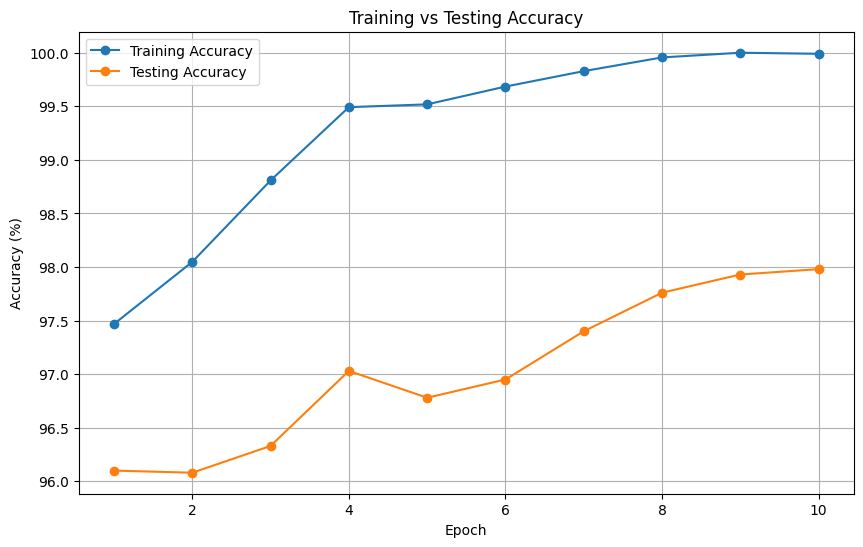

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import timm
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(42)
np.random.seed(42)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_epochs = 10
batch_size = 64
learning_rate = 1e-4
weight_decay = 1e-2

transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomCrop(224, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                        std=[0.2023, 0.1994, 0.2010]),
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                        std=[0.2023, 0.1994, 0.2010]),
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform_train)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Load pretrained Swin Transformer model
model = timm.create_model('swin_tiny_patch4_window7_224', pretrained=True, num_classes=10)
model = model.to(device)

# optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

train_accuracies = []
test_accuracies = []

def train_model():
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for i, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            if (i + 1) % 100 == 0:
                epoch_train_accuracy = 100 * correct / total
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}], '
                      f'Loss: {running_loss/100:.4f}, Training Accuracy: {epoch_train_accuracy:.2f}%')
                running_loss = 0.0
                correct = 0
                total = 0

        epoch_train_accuracy = evaluate_model(train_loader)
        train_accuracies.append(epoch_train_accuracy)

        test_accuracy = evaluate_model(test_loader)
        test_accuracies.append(test_accuracy)
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Accuracy: {epoch_train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

        scheduler.step()

def evaluate_model(loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    model.train()
    return accuracy

print("Starting training...")
train_model()

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Testing Accuracy', marker='o')
plt.title('Training vs Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()
plt.savefig('train_test_accuracy.png')

final_accuracy = evaluate_model(test_loader)
print(f'Final Test Accuracy: {final_accuracy:.2f}%')